# Logistic Regression Quiz : Chronic Kidney Disease 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [4]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
df.tail(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
df.sample(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
105,105,65.0,80.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,...,42,6800,5.2,no,no,no,good,no,no,ckd
264,264,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50,5000,4.5,no,no,no,good,no,no,notckd
130,130,50.0,90.0,1.010,2.0,0.0,normal,abnormal,present,present,...,22,16300,2.7,no,no,no,poor,yes,yes,ckd
260,260,30.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9400,5.3,no,no,no,good,no,no,notckd
13,13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
24,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39,8300,4.6,yes,no,no,poor,no,no,ckd
163,163,46.0,80.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,27,8100,3.2,yes,no,no,poor,no,yes,ckd
351,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40,9900,4.7,no,no,no,good,no,no,notckd
304,304,33.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,45,6200,4.5,no,no,no,good,no,no,notckd


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม  
## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

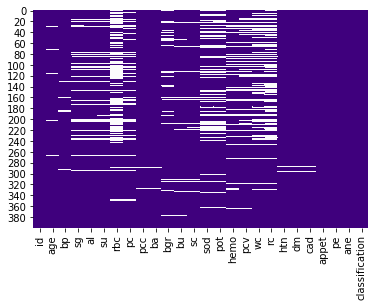

In [7]:
# check missing values with heatmap
sns.heatmap(df.isnull(), cmap='Purples_r', cbar=False)
plt.show()

In [8]:
# explore data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
# explore numerical columns
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
# ให้ id เป็น Index
df.set_index('id', inplace=True)

In [11]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
# get numerical column list and string column list
def get_col_types(df):
    num_col = []
    str_col = []

    for col in df.columns :
        if (df[col].dtypes != 'O'):
            num_col.append(col)
        else:
            str_col.append(col)
    return num_col, str_col

In [13]:
num_col, str_col = get_col_types(df)
print(num_col)
print(str_col)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [14]:
# explore string columns
for col in str_col:
    print(col)
    print(df[col].value_counts(), '\n')

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64 

pc
normal      259
abnormal     76
Name: pc, dtype: int64 

pcc
notpresent    354
present        42
Name: pcc, dtype: int64 

ba
notpresent    374
present        22
Name: ba, dtype: int64 

pcv
41      21
52      21
48      19
44      19
40      16
43      14
42      13
45      13
33      12
28      12
50      12
32      12
36      12
37      11
34      11
30       9
46       9
35       9
29       9
31       8
24       7
39       7
26       6
38       5
49       4
54       4
53       4
47       4
51       4
27       3
25       3
22       3
19       2
23       2
14       1
9        1
17       1
21       1
\t43     1
16       1
15       1
18       1
20       1
\t?      1
Name: pcv, dtype: int64 

wc
9800      11
6700      10
7200       9
9600       9
9200       9
          ..
16300      1
\t8400     1
10800      1
5900       1
12200      1
Name: wc, Length: 92, dtype: int64 

rc
5.2    18
4.5    16
4.9    14
4.7    11
4.8    1

In [15]:
# pcv, wc, and rc should be numeric type
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [16]:
# remove 'pcv', 'wc', 'rc' from str_col and add to 
num_col, str_col = get_col_types(df)
print(num_col)
print(str_col)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [17]:
# explore string columns again
for col in str_col:
    print(col)
    print(df[col].value_counts(), '\n')

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64 

pc
normal      259
abnormal     76
Name: pc, dtype: int64 

pcc
notpresent    354
present        42
Name: pcc, dtype: int64 

ba
notpresent    374
present        22
Name: ba, dtype: int64 

htn
no     251
yes    147
Name: htn, dtype: int64 

dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64 

cad
no      362
yes      34
\tno      2
Name: cad, dtype: int64 

appet
good    317
poor     82
Name: appet, dtype: int64 

pe
no     323
yes     76
Name: pe, dtype: int64 

ane
no     339
yes     60
Name: ane, dtype: int64 

classification
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64 



In [18]:
# replace '\tno' and '\tyes' with 'no' and 'yes' in dm columns
df['dm'].replace(['\tno', '\tyes', ' yes'], ['no', 'yes','yes'], inplace=True)
# explore dm again
df['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [19]:
# replace '\tno' with 'no' in cad columns
df['cad'].replace(['\tno'], ['no'], inplace=True)
# explore cad again
df['cad'].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [20]:
# replace 'ckd\t' with 'ckd' in classification columns
df['classification'].replace(['ckd\t'], ['ckd'], inplace=True)
# explore classification again
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [21]:
# explore string columns again
for col in str_col:
    print(col)
    print(df[col].value_counts(), '\n')

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64 

pc
normal      259
abnormal     76
Name: pc, dtype: int64 

pcc
notpresent    354
present        42
Name: pcc, dtype: int64 

ba
notpresent    374
present        22
Name: ba, dtype: int64 

htn
no     251
yes    147
Name: htn, dtype: int64 

dm
no     261
yes    137
Name: dm, dtype: int64 

cad
no     364
yes     34
Name: cad, dtype: int64 

appet
good    317
poor     82
Name: appet, dtype: int64 

pe
no     323
yes     76
Name: pe, dtype: int64 

ane
no     339
yes     60
Name: ane, dtype: int64 

classification
ckd       250
notckd    150
Name: classification, dtype: int64 



Note : all string columns are categorical variables, need .get_dummies later

/home/samantha/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/samantha/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


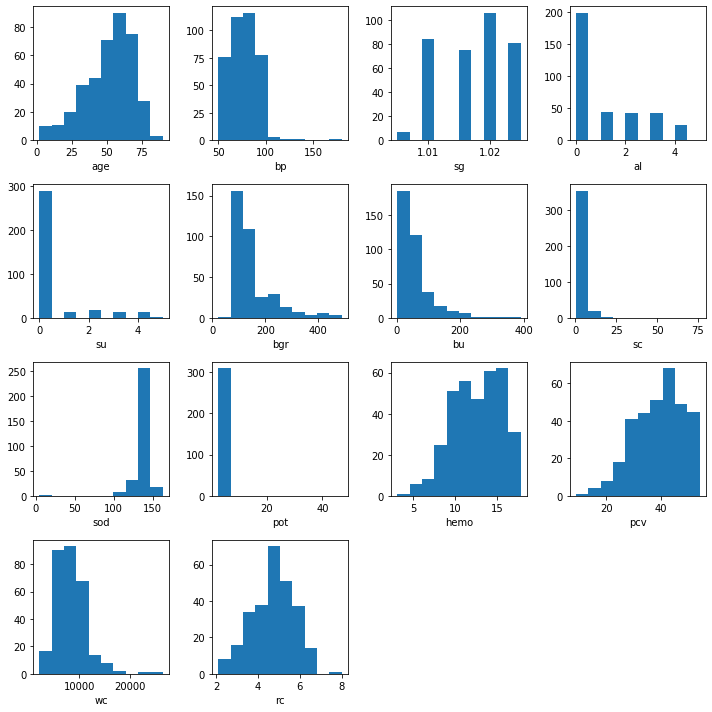

In [22]:
# explore numerical columns distribution

fig = plt.figure(figsize=(10,10))
i=1
for col in num_col :
    #print (i,':',col)
    plt.subplot(4, 4, i)
    plt.hist(df[col])
    plt.xlabel(col)
    i+=1
fig.tight_layout()
plt.show()

In [23]:
df['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [24]:
df['al'].value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [25]:
df['su'].value_counts()

0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64

In [26]:
df['pot'].value_counts()

5.0     30
3.5     30
4.9     27
4.7     17
4.8     16
4.1     14
4.2     14
4.4     14
4.0     14
3.8     14
3.9     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.7      4
5.3      4
5.5      3
5.4      3
3.2      3
6.3      3
2.9      3
3.3      3
3.0      2
6.5      2
5.9      2
2.5      2
5.8      2
5.6      2
2.7      1
7.6      1
47.0     1
6.4      1
2.8      1
39.0     1
5.1      1
6.6      1
Name: pot, dtype: int64

In [27]:
# get discrete columns ไว้ใช้แทนค่า missing value ด้วย Mode 
discrete_col = ['sg', 'al', 'su']

# delete num_cat_col from num_col
for i in discrete_col :
    num_col.remove(i)
print(num_col)
print(discrete_col)

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
['sg', 'al', 'su']


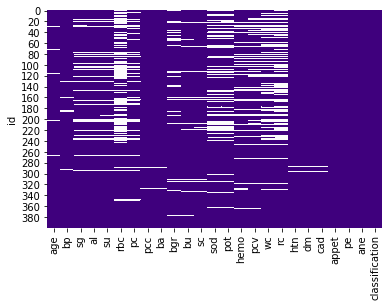

In [28]:
# check missing values with heatmap again
sns.heatmap(df.isnull(), cmap='Purples_r', cbar=False)
plt.show()

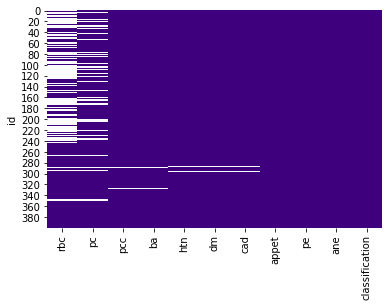

In [29]:
# check missing values in string columns
sns.heatmap(df[str_col].isnull(), cmap='Purples_r', cbar=False)
plt.show()

In [30]:
df[str_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rbc             248 non-null    object
 1   pc              335 non-null    object
 2   pcc             396 non-null    object
 3   ba              396 non-null    object
 4   htn             398 non-null    object
 5   dm              398 non-null    object
 6   cad             398 non-null    object
 7   appet           399 non-null    object
 8   pe              399 non-null    object
 9   ane             399 non-null    object
 10  classification  400 non-null    object
dtypes: object(11)
memory usage: 37.5+ KB


In [31]:
# fill missing value ใน string columns ด้วย mode
# *** อาจไม่เหมาะสม เนื่องจากเป็นข้อมูลทางการแพทย์ ***
str_mode = df[str_col].mode()
str_mode

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [32]:
for col in str_col:
    df[col].fillna(value=str_mode[col][0], inplace=True)

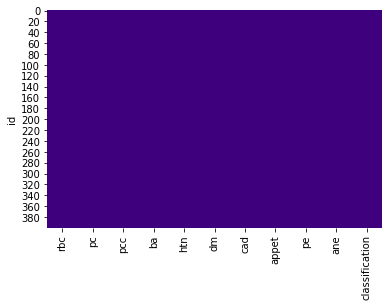

In [33]:
# check missing values in string columns
sns.heatmap(df[str_col].isnull(), cmap='Purples_r', cbar=False)
plt.show()

In [34]:
# fill missing value ใน discrete columns ด้วย mode
# *** อาจไม่เหมาะสม เนื่องจากเป็นข้อมูลทางการแพทย์ ***
discrete_mode = df[discrete_col].mode()
discrete_mode

,sg,al,su
0,1.02,0.0,0.0


In [35]:
for col in discrete_col:
    df[col].fillna(value=discrete_mode[col][0], inplace=True)

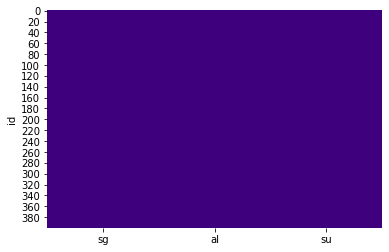

In [36]:
# check missing values in numerical-categorical columns
sns.heatmap(df[discrete_col].isnull(), cmap='Purples_r', cbar=False)
plt.show()

In [37]:
# fill missing value ใน numerical columns ด้วย mean
# *** อาจไม่เหมาะสม เนื่องจากเป็นข้อมูลทางการแพทย์ ***
num_mean = df[num_col].mean()
num_mean

age       51.483376
bp        76.469072
bgr      148.036517
bu        57.425722
sc         3.072454
sod      137.528754
pot        4.627244
hemo      12.526437
pcv       38.884498
wc      8406.122449
rc         4.707435
dtype: float64

In [38]:
for col in num_col:
    df[col].fillna(value=num_mean[col], inplace=True)

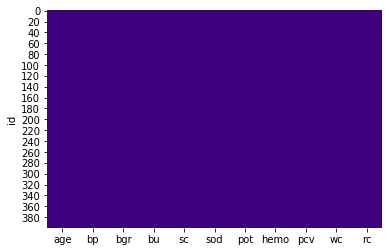

In [39]:
# check missing values in numerical columns
sns.heatmap(df[num_col].isnull(), cmap='Purples_r', cbar=False)
plt.show()

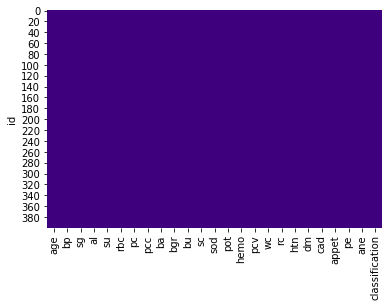

In [40]:
# check missing values of entire dataframe
sns.heatmap(df.isnull(), cmap='Purples_r', cbar=False)
plt.show()

## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

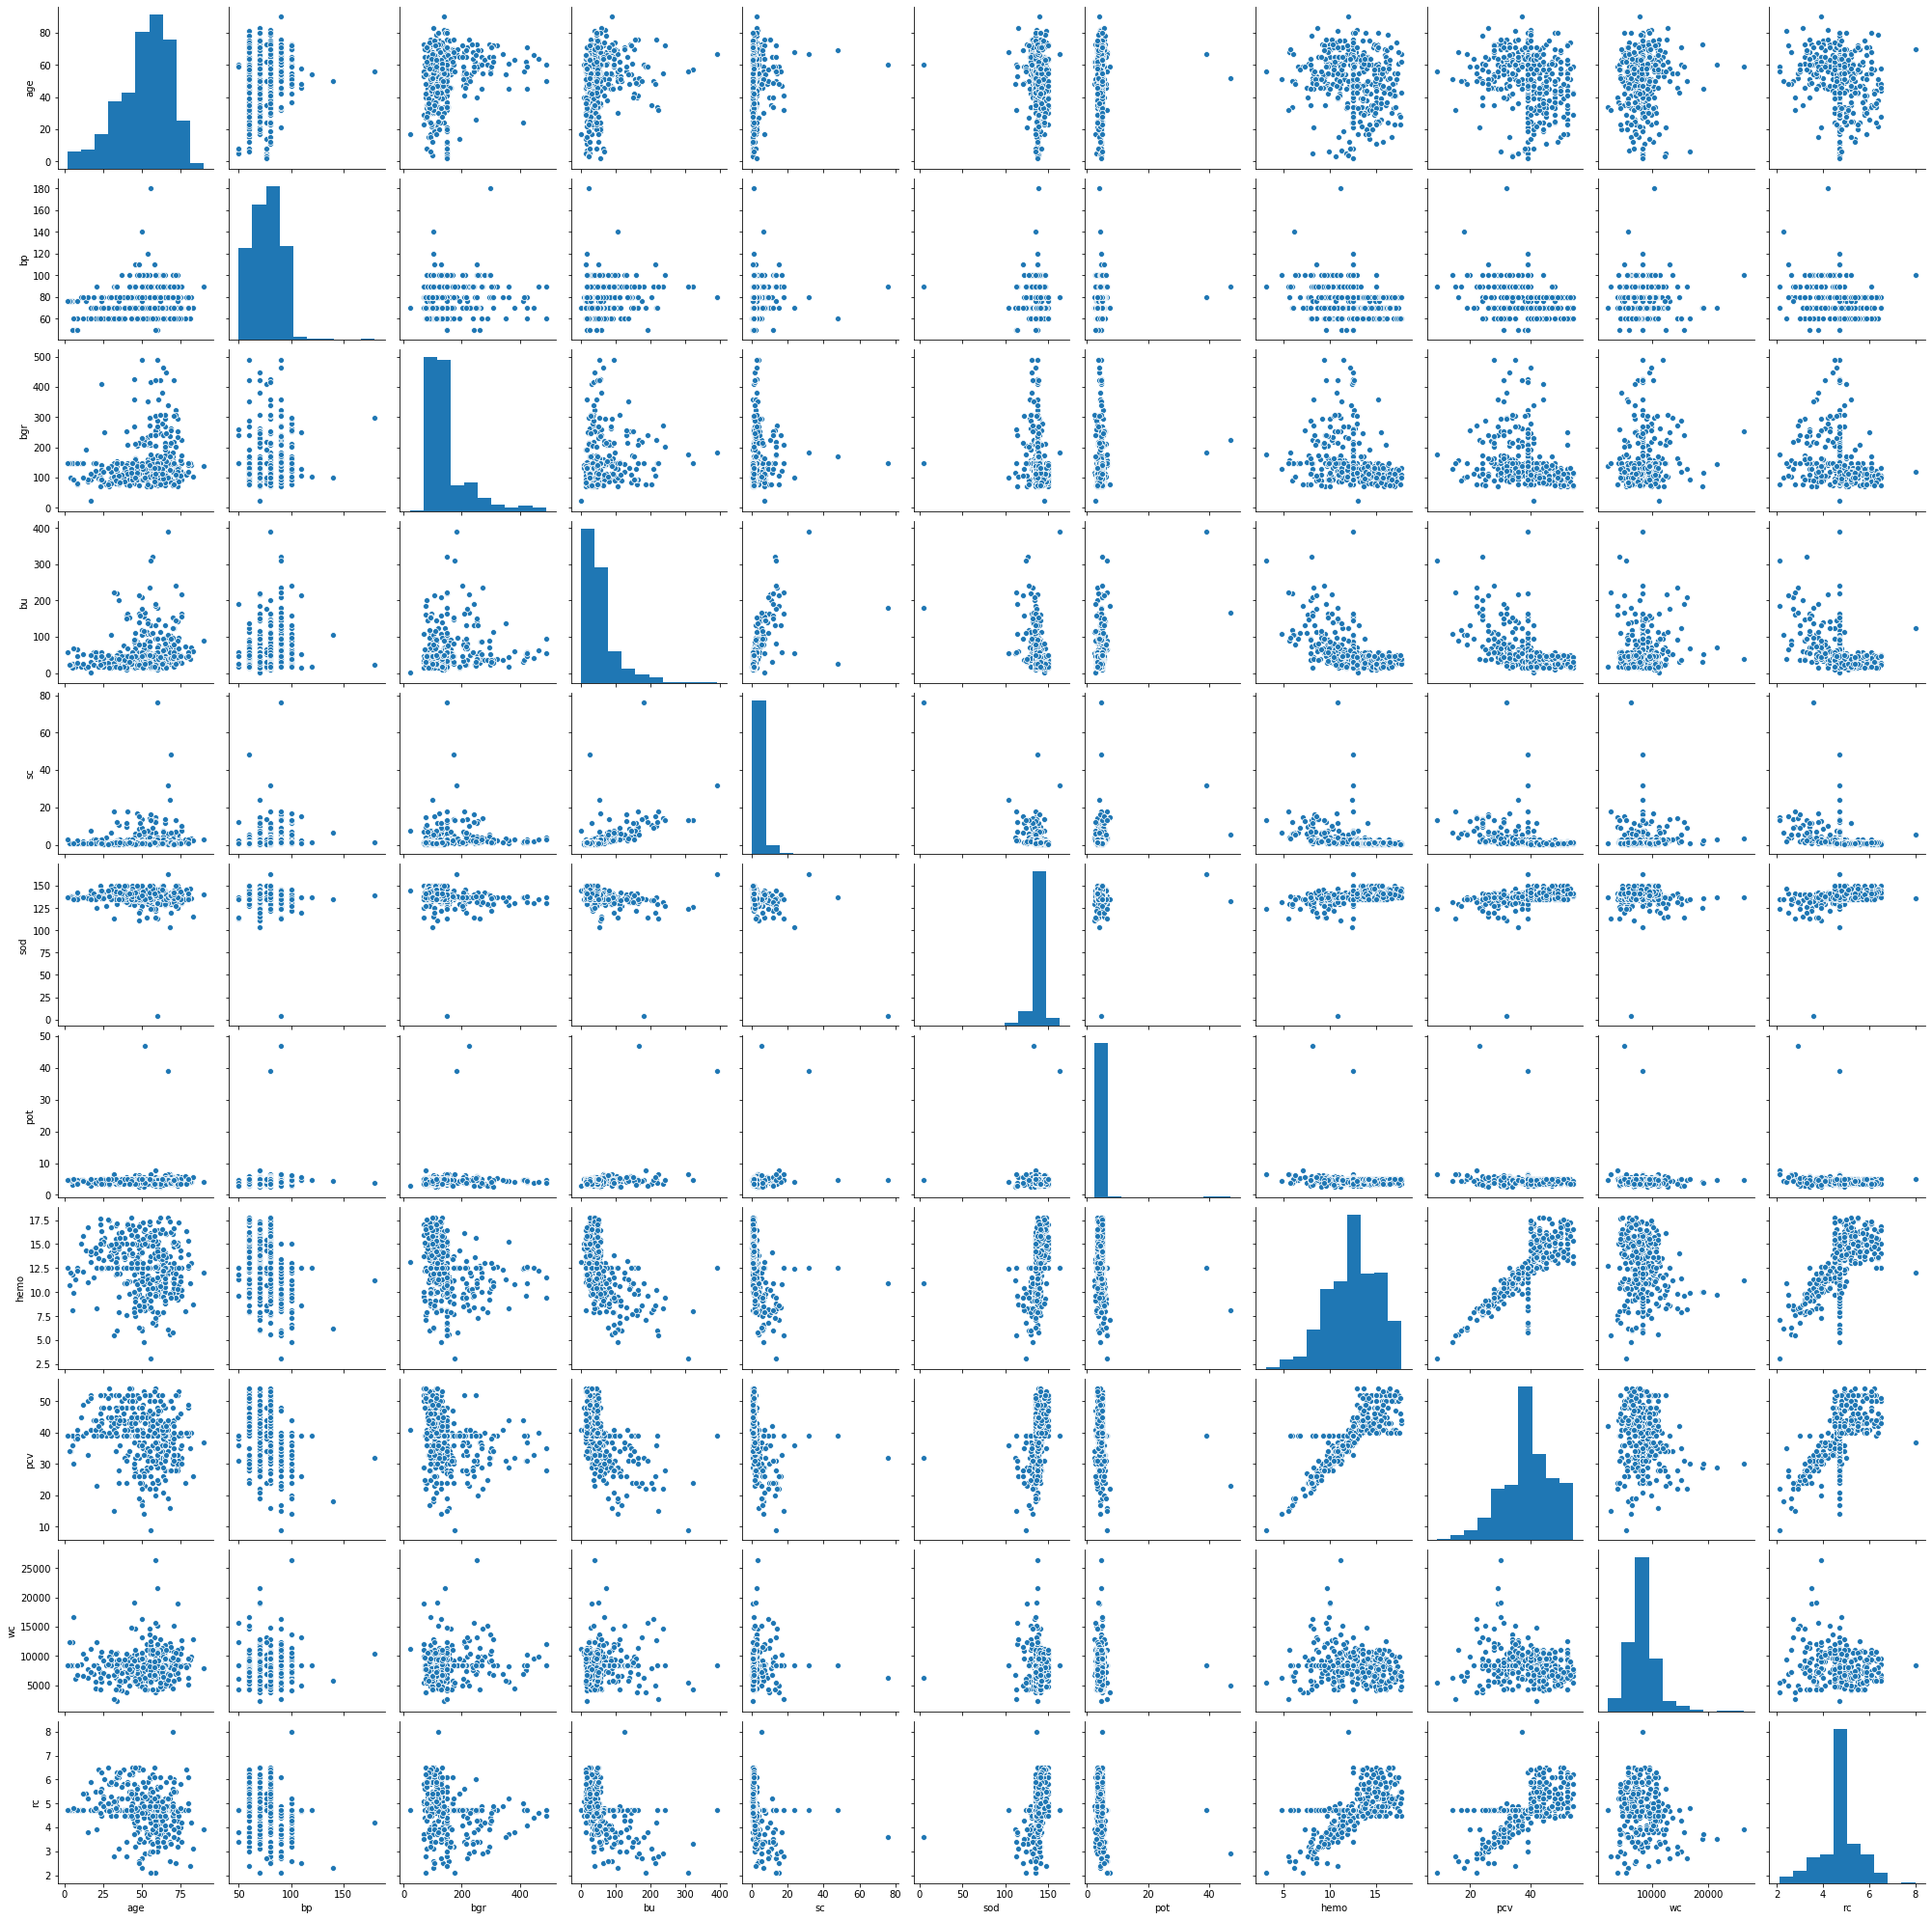

In [41]:
sns.pairplot(df[num_col])
plt.show()

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

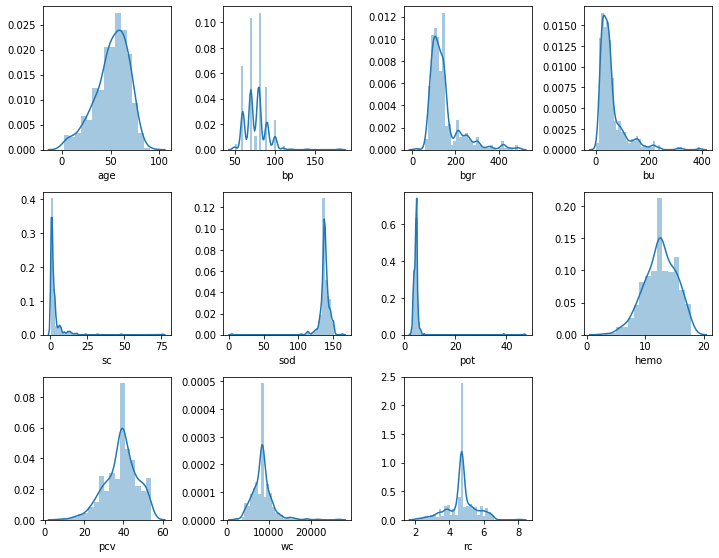

In [42]:
fig = plt.figure(figsize=(10,10))
i=1

for col in num_col:
    plt.subplot(4,4,i)
    sns.distplot(df[col])
    i+=1

fig.tight_layout()
plt.show()

## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

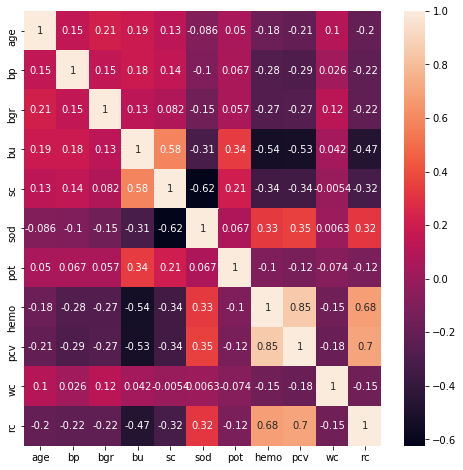

In [43]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

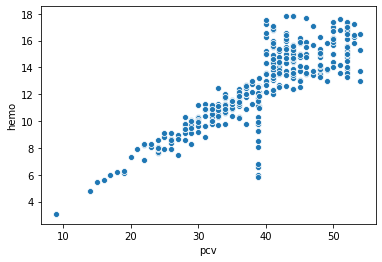

In [44]:
sns.scatterplot(x=df['pcv'], y=df['hemo'])
plt.show()

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

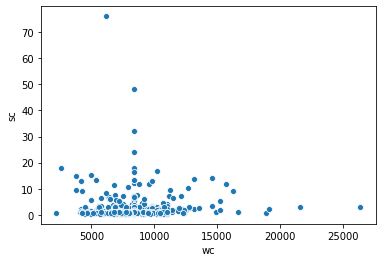

In [45]:
# wc และ sc มีค่า correlation ใกล้เคียง 0 มากที่สุด
sns.scatterplot(x=df['wc'], y=df['sc'])
plt.show()

## 10. สร้าง histogram ของ feature ต่างๆที่สนใจ

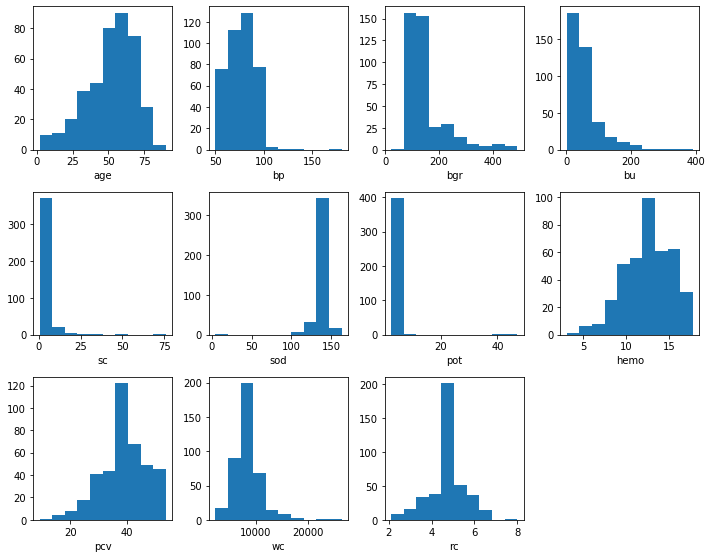

In [46]:
fig = plt.figure(figsize=(10,10))
i=1

for col in num_col:
    plt.subplot(4,4,i)
    plt.hist(df[col])
    plt.xlabel(col)
    i+=1

fig.tight_layout()
plt.show()

## 11. สร้าง box plot ของ features ที่สนใจ

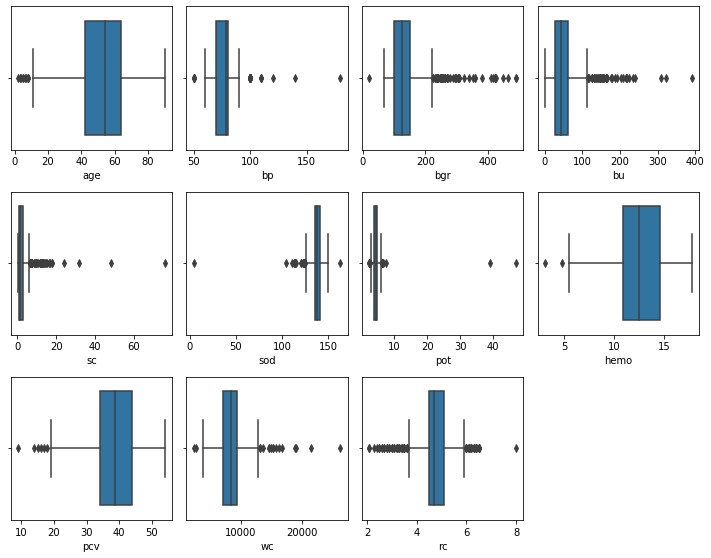

In [47]:
fig = plt.figure(figsize=(10,10))
i=1

for col in num_col:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i+=1

fig.tight_layout()
plt.show()

## 13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

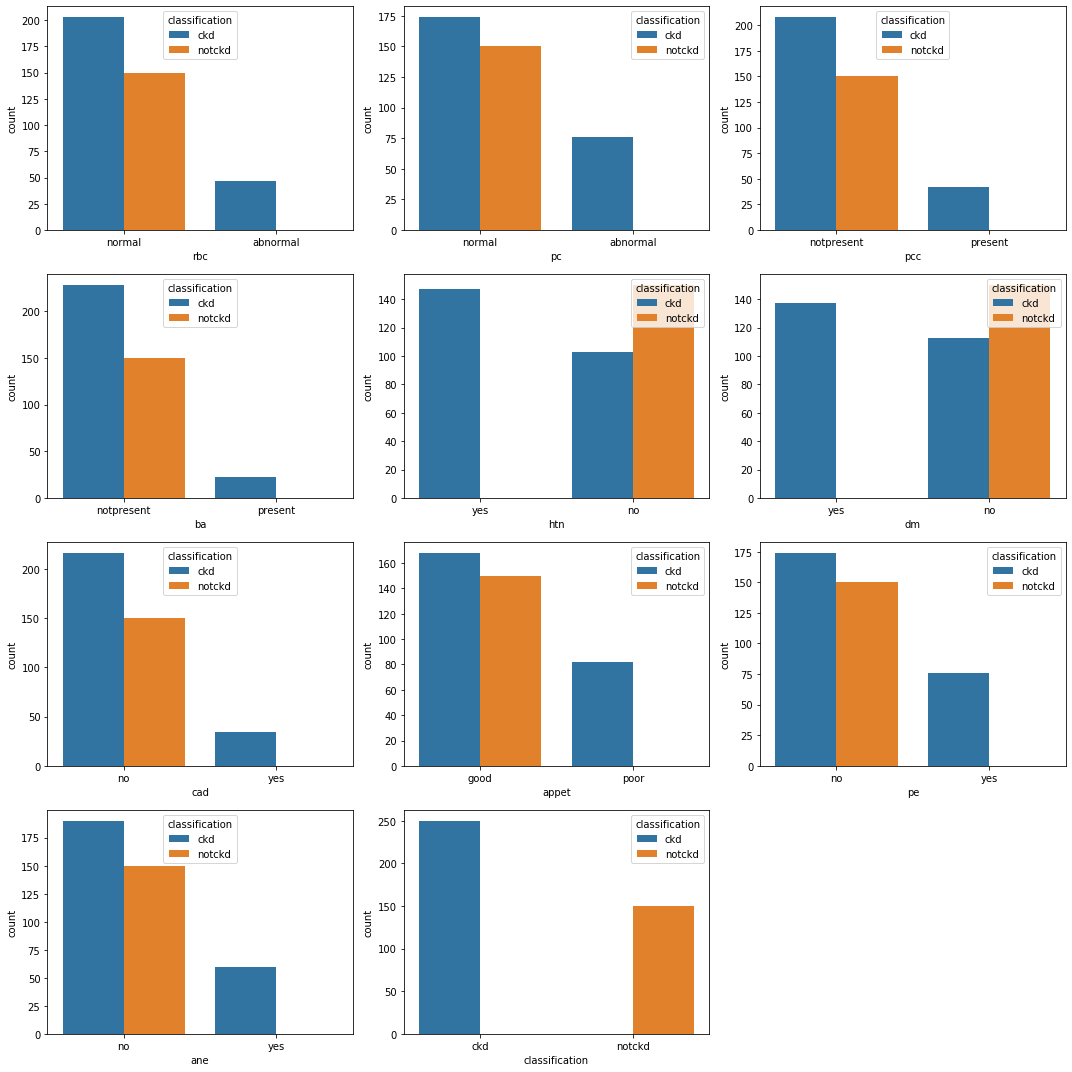

In [48]:
# bar plot ข้อมูลประเภท categorical เพื่อดูว่ามีผลต่อ classification หรือไม่
fig = plt.figure(figsize=(15,15))
i = 1
for col in str_col :
    plt.subplot(4,3,i)
    sns.countplot(df[col], hue=df['classification'])
    i+=1

fig.tight_layout()
plt.show()

Note :  
จะสังเกตเห็นว่ากราฟมี 2 ลักษณะ  
แบบที่ 1  
ตัวอย่าง red blood cell (rbc)  
* ถ้า rbc เป็น abnormal : มีภาวะไตวาย (kidney disease)
* ถ้า rbc เป็น normal : ก็ยังมีโอกาสมีภาวะไตวาย ได้ถึง 200/350 = 57%

แบบที่ 2  
ตัวอย่าง hypertension (htn) หรือ ความดันโลหิตสูง  
* ถ้า htn เป็น yes : มีภาวะไตวาย
* ถ้า htn เป็น no : อาจมีภาวะไตวาย 100/240 = 42%

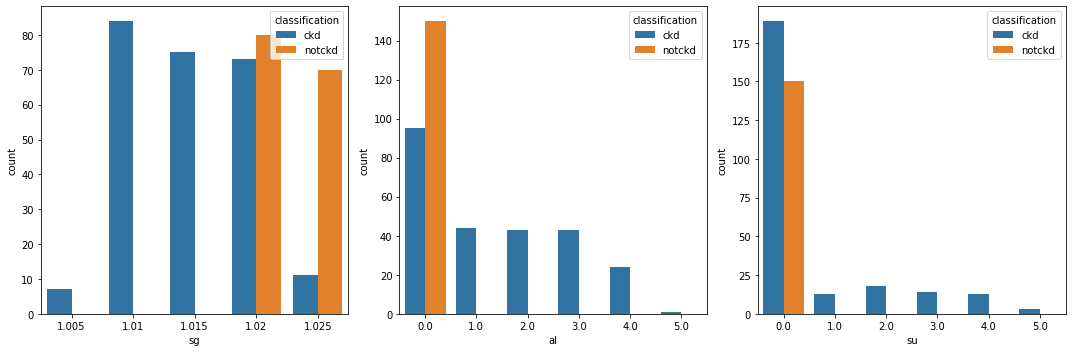

In [49]:
# bar plot ข้อมูลประเภท discrete เพื่อดูว่ามีผลต่อ classification หรือไม่
fig = plt.figure(figsize=(15,5))
i = 1
for col in discrete_col :
    plt.subplot(1,3,i)
    sns.countplot(df[col], hue=df['classification'])
    i+=1

fig.tight_layout()
plt.show()

Note :  
* ที่ specific gravity (sg) น้อยกว่า 1.025 มีโอกาสพบภาวะไตวายมากกว่า  
* ที่ albumin เท่ากับ 0.0 มีโอกาสพบภาวะไตวายมากกว่าค่า albumin ระดับอื่นๆ 
* ที่ระดับน้ำตาล sugar (su) เท่ากับ 0.0 มีโอกาสพบภาวะไตวายมากกว่าที่ระดับอื่นๆ

## 12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [50]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [51]:
# independent variable (X)
X = df.drop(['classification'], axis=1).copy()
# dependent variable (y)
y = df['classification'].copy()

In [52]:
X.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no


In [53]:
y[:5]

id
0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: classification, dtype: object

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (320, 24)
y_train shape :  (320,)
X_test shape :  (80, 24)
y_test shape :  (80,)


## 14. ทำ Data Cleaning โดยการลบ หรือ fill average ขึ้นอยู่กับความเหมาะสม  
Note : ทำ Data Cleaning ไปแล้วในตอนที่ 3-4

In [56]:
#ทำการแปลง categorical variables เป็น dummy variables
# เลือก string columns ของ X ที่จะทำการแปลงเป็น dummy variable
str_col.remove('classification')
str_col

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [57]:
X[str_col].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [58]:
temp = pd.get_dummies(X[str_col], drop_first=True)
temp

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0


In [59]:
num_col

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [61]:
# concatenate temp with other X columns
new_X = pd.concat([X[num_col], X[discrete_col], temp], axis=1)
print(new_X.shape)

(400, 24)


In [62]:
new_X.head(5)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,1,1,0,0,0,0,0,0,0,0


In [63]:
new_X.dtypes

age            float64
bp             float64
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wc             float64
rc             float64
sg             float64
al             float64
su             float64
rbc_normal       uint8
pc_normal        uint8
pcc_present      uint8
ba_present       uint8
htn_yes          uint8
dm_yes           uint8
cad_yes          uint8
appet_poor       uint8
pe_yes           uint8
ane_yes          uint8
dtype: object

In [64]:
# convert y from ckd to 1, and notckd to 0
y.replace(['ckd', 'notckd'], [1,0], inplace=True)
y

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

Note : NOW our new_X and y are ready to be used in mode

## 15. เลือก features ที่สนใจนำมาเทรน และ เลือก features ทั้งหมด

## 16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วดูว่าแบบ features ที่เราเลือกมา กับ แบบเลือกทุก features แบบใดให้ผลลัพธ์ที่ดีกว่า

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [73]:
def model_evaluation(X_train, X_test, y_train, y_test):

    # define model
    log_reg = LogisticRegression()
    # fit model
    log_reg.fit(X_train, y_train)
    # make prediction
    y_pred = log_reg.predict(X_test)
    
    # evaluation metrics
    cm = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    
    print('-----evaluation metrix-----')
    print('confusion matrix : \n', cm)
    print('accuracy : ', accuracy)
    print('F1 score : ', f1_score)
    print('precision : ', precision)
    print('recall : ', recall)
    print('\n')
    
    return cm, accuracy, f1_score, precision, recall

In [67]:
# เลือก features ที่สนใจ โดยพิจารณาจาก correlation of X and y
corr = new_X.corrwith(y).abs().sort_values(ascending=False)
print(corr)

hemo           0.729628
pcv            0.690060
sg             0.659504
rc             0.590913
htn_yes        0.590438
dm_yes         0.559060
al             0.531562
bgr            0.401374
appet_poor     0.393341
pc_normal      0.375154
pe_yes         0.375154
bu             0.372033
sod            0.342288
ane_yes        0.325396
su             0.294555
sc             0.294079
bp             0.290600
rbc_normal     0.282642
pcc_present    0.265313
cad_yes        0.236088
age            0.225405
wc             0.205274
ba_present     0.186871
pot            0.076921
dtype: float64


In [68]:
# เลือก features ที่มี correlation มากกว่า 0.5
thresh_corr = 0.5
features = corr[corr > thresh_corr].index.values
print('selected features : ', features)

selected features :  ['hemo' 'pcv' 'sg' 'rc' 'htn_yes' 'dm_yes' 'al']


In [71]:
new_X[features]

,hemo,pcv,sg,rc,htn_yes,dm_yes,al
id,,,,,,,
0,15.4,44.0,1.020,5.200000,1,1,1.0
1,11.3,38.0,1.020,4.707435,0,0,4.0
2,9.6,31.0,1.010,4.707435,0,1,2.0
3,11.2,32.0,1.005,3.900000,1,0,4.0
4,11.6,35.0,1.010,4.600000,0,0,2.0
...,...,...,...,...,...,...,...
395,15.7,47.0,1.020,4.900000,0,0,0.0
396,16.5,54.0,1.025,6.200000,0,0,0.0
397,15.8,49.0,1.020,5.400000,0,0,0.0


In [76]:
# เลือกเฉพาะ features ที่สนใจ 
print('Model 1 : เลือกเฉพาะ features ที่สนใจ')
print('features : ', features)
X_train, X_test, y_train, y_test = train_test_split(new_X[features], y, test_size=0.2, random_state=100)
cm1, acc1, f11, precision1, recall1 = model_evaluation(X_train, X_test, y_train, y_test)

# ใช้ features ทั้งหมด
print('Model 2 : all features')
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=100)
cm2, acc2, f12, precision2, recall2 = model_evaluation(X_train, X_test, y_train, y_test)

Model 1 : เลือกเฉพาะ features ที่สนใจ
features :  ['hemo' 'pcv' 'sg' 'rc' 'htn_yes' 'dm_yes' 'al']
-----evaluation metrix-----
confusion matrix : 
 [[28  1]
 [ 1 50]]
accuracy :  0.975
F1 score :  0.9803921568627451
precision :  0.9803921568627451
recall :  0.9803921568627451


Model 2 : all features
-----evaluation metrix-----
confusion matrix : 
 [[24  5]
 [ 5 46]]
accuracy :  0.875
F1 score :  0.9019607843137255
precision :  0.9019607843137255
recall :  0.9019607843137255




/home/samantha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/samantha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Note :  
โมเดลแบบเลือก features ที่มี correlation กับ y ให้ผลลัพธ์ที่ดีกว่า

## 17. ทำ Standardize ข้อมูล features ทั้งหมดก่อนเทรนโมเดล

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
# define standard scaler
sc_X = StandardScaler()

# get train-test split แบบทุก features
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=100)

# fit transform X_train and y_train
X_train = sc_X.fit_transform(X_train)

# fit X_test
X_test = sc_X.transform(X_test)

## 18. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วดูว่าแบบไม่ standardize กับ แบบ standardize แบบใดให้ผลลัพธ์ดีกว่า

In [79]:
print('Model 3 : all features + standardization')
cm3, acc3, f13, precision3, recall3 = model_evaluation(X_train, X_test, y_train, y_test)

Model 3 : all features + standardization
-----evaluation metrix-----
confusion matrix : 
 [[29  0]
 [ 0 51]]
accuracy :  1.0
F1 score :  1.0
precision :  1.0
recall :  1.0




## 19. เลือก features ที่สนใจ และทำ standardization, เทรนโมเดล, วัดผล และเปรียบเทียบกับข้อ 18

In [80]:
print('selected features : ',features)

selected features :  ['hemo' 'pcv' 'sg' 'rc' 'htn_yes' 'dm_yes' 'al']


In [81]:
# define standard scaler
sc_X = StandardScaler()

# get train-test split of selected features
X_train, X_test, y_train, y_test = train_test_split(new_X[features], y, test_size=0.2, random_state=100)

# fit transform X_train and y_train
X_train = sc_X.fit_transform(X_train)

# fit X_test
X_test = sc_X.transform(X_test)

In [82]:
print('Model 4 : selected features + standardization')
print('selected features : ',features)
cm4, acc4, f14, precision4, recall4 = model_evaluation(X_train, X_test, y_train, y_test)

Model 4 : selected features + standardization
selected features :  ['hemo' 'pcv' 'sg' 'rc' 'htn_yes' 'dm_yes' 'al']
-----evaluation metrix-----
confusion matrix : 
 [[28  1]
 [ 1 50]]
accuracy :  0.975
F1 score :  0.9803921568627451
precision :  0.9803921568627451
recall :  0.9803921568627451




## 20. สิ่งที่สำคัญที่สุดในการทำ Machine Learning คือ ความคิดสร้างสรรค์ ดังนั้น ลองทำวิธีใดก็ได้ตามที่สอนมาทั้งหมด เพื่อให้สุดท้ายได้ผลลัพธ์ accuracy, F1 Score มากที่สุดที่ทำได้

Note : วิธีที่ได้ผลลัพธ์ดีที่สุดคือ Model 3 : all features + standardization  
เนื่องจากในกรณีทั่วไป ยิ่งจำนวน features เยอะ ยิ่งทำให้ model ซับซ้อนขึ้นและใช้เวลาในการ train มากขึ้น  
จึงจะขอลองดูว่าถ้าไม่ต้องใช้ features ทั้งหมด จะต้องใช้ features น้อยที่สุด กี่ตัว จึงจะได้ผลลัพธ์ดีที่สุด  
โดยจะเลือก features เข้ามาในโมเดลทีละตัว เรียงตาม correlation

In [112]:
corr

hemo           0.729628
pcv            0.690060
sg             0.659504
rc             0.590913
htn_yes        0.590438
dm_yes         0.559060
al             0.531562
bgr            0.401374
appet_poor     0.393341
pc_normal      0.375154
pe_yes         0.375154
bu             0.372033
sod            0.342288
ane_yes        0.325396
su             0.294555
sc             0.294079
bp             0.290600
rbc_normal     0.282642
pcc_present    0.265313
cad_yes        0.236088
age            0.225405
wc             0.205274
ba_present     0.186871
pot            0.076921
dtype: float64

In [116]:
num_features = []
acc = []
f1 = []
prec = []
rec = []

for i in range(1, len(corr)+1):

    features = corr.index.values[:i]
    print(len(features),' selected features : ', features)

    X_train, X_test, y_train, y_test = train_test_split(new_X[features], y, test_size=0.2, random_state=100)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    cm, accuracy, f1score, precision, recall = model_evaluation(X_train, X_test, y_train, y_test)

    # keep results
    num_features.append(i)
    acc.append(accuracy)
    f1.append(f1score)
    prec.append(precision)
    rec.append(recall)

1  selected features :  ['hemo']
-----evaluation metrix-----
confusion matrix : 
 [[24  5]
 [ 2 49]]
accuracy :  0.9125
F1 score :  0.9333333333333333
precision :  0.9074074074074074
recall :  0.9607843137254902


2  selected features :  ['hemo' 'pcv']
-----evaluation metrix-----
confusion matrix : 
 [[28  1]
 [ 1 50]]
accuracy :  0.975
F1 score :  0.9803921568627451
precision :  0.9803921568627451
recall :  0.9803921568627451


3  selected features :  ['hemo' 'pcv' 'sg']
-----evaluation metrix-----
confusion matrix : 
 [[28  1]
 [ 2 49]]
accuracy :  0.9625
F1 score :  0.9702970297029702
precision :  0.98
recall :  0.9607843137254902


4  selected features :  ['hemo' 'pcv' 'sg' 'rc']
-----evaluation metrix-----
confusion matrix : 
 [[27  2]
 [ 1 50]]
accuracy :  0.9625
F1 score :  0.970873786407767
precision :  0.9615384615384616
recall :  0.9803921568627451


5  selected features :  ['hemo' 'pcv' 'sg' 'rc' 'htn_yes']
-----evaluation metrix-----
confusion matrix : 
 [[28  1]
 [ 1 50]]


Note :  
เราสามารถได้โมเดลที่มีผลลัพธ์ที่ดีที่สุดด้วย features เพียง 10 ค่า (น้อยกว่าครึ่งหนึ่งของ features ทั้งหมด)